In [1]:
import pandas as pd  # Import the pandas library and alias it as pd

df = pd.read_csv('application_train.csv')  # Read the CSV file into a DataFrame named df
df.shape  # Print the shape of the DataFrame (number of rows, number of columns)

(307511, 122)

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


In [3]:
# Load the CSV files into DataFrames
application_train = pd.read_csv('application_train.csv')
application_test = pd.read_csv('application_test.csv')

In [4]:
print(application_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


In [5]:
print(application_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


In [6]:
from sklearn.impute import SimpleImputer

# Identify numerical and categorical columns
numerical_columns = application_train.select_dtypes(include=['number']).columns
numerical_columns = application_test.select_dtypes(include=['number']).columns
# Impute numerical columns with mean
numerical_imputer = SimpleImputer(strategy='mean')
application_train[numerical_columns] = numerical_imputer.fit_transform(application_train[numerical_columns])
application_test[numerical_columns] = numerical_imputer.fit_transform(application_test[numerical_columns])

missing_values1 = application_train.isnull().sum()
missing_values2 = application_test.isnull().sum()

# Display the result
print(missing_values1)
print(missing_values2)

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64
SK_ID_CURR                    0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 121, dtype: int64


In [7]:
# Filter columns with missing values
columns_with_missing_values1 = missing_values1[missing_values1 > 0]
columns_with_missing_values2 = missing_values2[missing_values2 > 0]

# Display columns with missing values
print(columns_with_missing_values1)
print(columns_with_missing_values2)

NAME_TYPE_SUITE          1292
OCCUPATION_TYPE         96391
FONDKAPREMONT_MODE     210295
HOUSETYPE_MODE         154297
WALLSMATERIAL_MODE     156341
EMERGENCYSTATE_MODE    145755
dtype: int64
NAME_TYPE_SUITE          911
OCCUPATION_TYPE        15605
FONDKAPREMONT_MODE     32797
HOUSETYPE_MODE         23619
WALLSMATERIAL_MODE     23893
EMERGENCYSTATE_MODE    22209
dtype: int64


In [8]:
print(application_train.info())
print(application_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(105), int64(1), object(16)
memory usage: 286.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(105), object(16)
memory usage: 45.0+ MB
None


In [9]:
from sklearn.preprocessing import LabelEncoder

# Load the CSV files into DataFrames
application_train = pd.read_csv('application_train.csv')
application_test = pd.read_csv('application_test.csv')

# Initialize LabelEncoder
le = LabelEncoder()
le_count = 0

# Iterate over columns in the training set
for col in application_train.columns:
    if application_train[col].dtype == 'object':
        if len(application_train[col].unique()) <= 2:
            le.fit(application_train[col])
            application_train[col] = le.transform(application_train[col])
            application_test[col] = le.transform(application_test[col])
            le_count += 1

print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [ ]:
# Before one-hot encoding
print("Before one-hot encoding:", len(application_train.columns))

# Identify categorical columns
categorical_columns_train = application_train.select_dtypes('object').columns
categorical_columns_test = application_test.select_dtypes('object').columns

# Apply one-hot encoding to the training set
application_train = pd.get_dummies(application_train, columns=categorical_columns_train)

# Apply one-hot encoding to the test set
application_test = pd.get_dummies(application_test, columns=categorical_columns_test)

# Before alignment
print("Before alignment:", len(application_train.columns), len(application_test.columns))

# Ensure that both datasets have the same columns after one-hot encoding
common_columns = list(set(application_train.columns) & set(application_test.columns))
application_train = application_train[common_columns]
application_test = application_test[common_columns]

# After alignment
print("After alignment:", len(application_train.columns), len(application_test.columns))

In [ ]:
application_train['TARGET'] = train_labels

In [10]:
# Before one-hot encoding
print("Before one-hot encoding:", len(application_train.columns))

# Identify categorical columns
categorical_columns_train = application_train.select_dtypes('object').columns
categorical_columns_test = application_test.select_dtypes('object').columns
train_labels = application_train['TARGET']
# Apply one-hot encoding to the training set
application_train = pd.get_dummies(application_train, columns=categorical_columns_train)

# Apply one-hot encoding to the test set
application_test = pd.get_dummies(application_test, columns=categorical_columns_test)

# Before alignment
print("Before alignment:", len(application_train.columns), len(application_test.columns))

# Ensure that both datasets have the same columns after one-hot encoding
common_columns = list(set(application_train.columns) & set(application_test.columns))
application_train = application_train[common_columns]
application_test = application_test[common_columns]
application_train['TARGET'] = train_labels
# After alignment
print("After alignment:", len(application_train.columns), len(application_test.columns))

Before one-hot encoding: 122
Before alignment: 243 239
After alignment: 240 239


In [11]:
years_birth = application_train['DAYS_BIRTH'] / -365
print(years_birth.describe())
# checking DAYS_BIRTH anomalies

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64


In [12]:
years_employed = application_train['DAYS_EMPLOYED']
print(years_employed.describe())
# checking DAYS_EMPLOYED anomalies

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


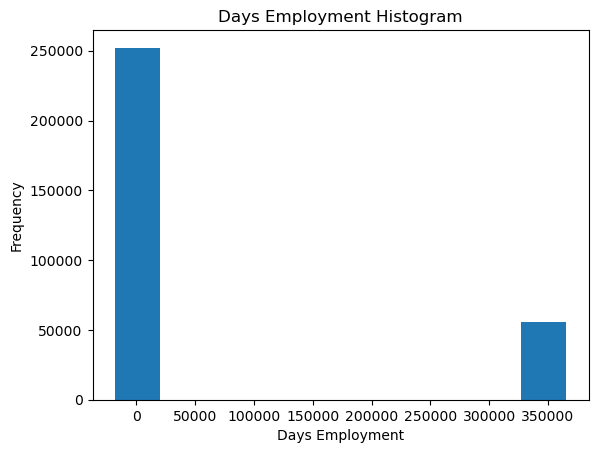

In [13]:
import matplotlib.pyplot as plt
# trying to do additional EDA
# Assuming 'application.train' is actually 'application_train'
application_train['DAYS_EMPLOYED'].plot.hist(title='Days Employment Histogram')
plt.xlabel('Days Employment')
plt.show()

In [14]:
# anomalies handling
anom = application_train[application_train['DAYS_EMPLOYED'] == 365243]
non_anom = application_train[application_train['DAYS_EMPLOYED'] != 365243]

print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('There are %d anomalies in days of employment' % len(anom))

The anomalies default on 5.40% of loans
The non-anomalies default on 8.66% of loans
There are 55374 anomalies in days of employment


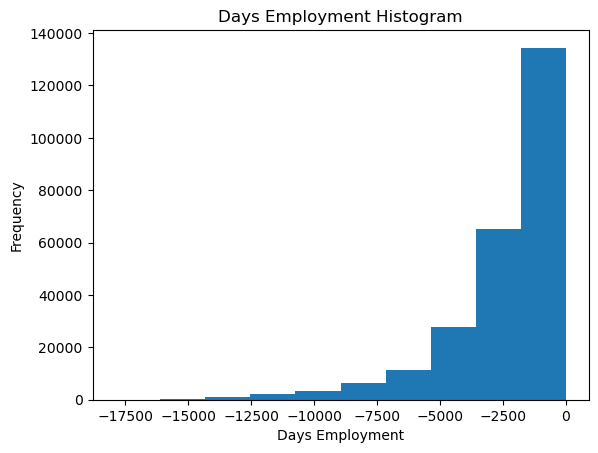

In [15]:
# visualize Anomalies Histogram
import numpy as np
import matplotlib.pyplot as plt

# Create a new column indicating anomalies in 'DAYS_EMPLOYED'
application_train['DAYS_EMPLOYED_ANOM'] = application_train['DAYS_EMPLOYED'] == 365243

# Replace 365243 with NaN in 'DAYS_EMPLOYED' column
application_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

# Plot the histogram
application_train['DAYS_EMPLOYED'].plot.hist(title='Days Employment Histogram')
plt.xlabel('Days Employment')
plt.show()

In [16]:
# Create a new column indicating anomalies in 'DAYS_EMPLOYED' for the test data
application_test['DAYS_EMPLOYED_ANOM'] = application_test['DAYS_EMPLOYED'] == 365243

# Replace 365243 with NaN in 'DAYS_EMPLOYED' column for the test data
application_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

# Print the number of anomalies in the test data
print('There are %d anomalies in the test data out of %d' % (application_test['DAYS_EMPLOYED_ANOM'].sum(), len(application_test)))

There are 9274 anomalies in the test data out of 48744


In [17]:
# Showing data correlations
correlations = application_train.corr()['TARGET'].sort_values()

print('Most positive correlations:\n', correlations.tail(15))
print('Most negative correlations:\n', correlations.head(15))

Most positive correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64
Most negativ

In [18]:
# Correlation between external source to TARGET
ext_data = application_train[['TARGET','EXT_SOURCE_1','EXT_SOURCE_3','EXT_SOURCE_2','DAYS_BIRTH']]
ext_data_corrs= ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.178919,-0.160472,0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.186846,0.213982,-0.600610
EXT_SOURCE_3,-0.178919,0.186846,1.000000,0.109167,-0.205478
EXT_SOURCE_2,-0.160472,0.213982,0.109167,1.000000,-0.091996
DAYS_BIRTH,0.078239,-0.600610,-0.205478,-0.091996,1.000000


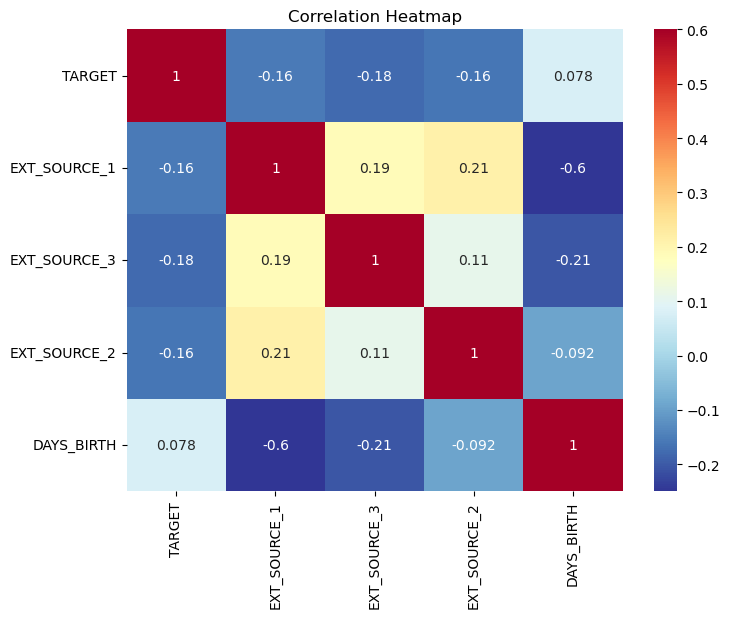

In [19]:
# Seeing heatmap for correlations between external source to TARGET
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Use sns.heatmap for better visualization
sns.heatmap(ext_data_corrs, cmap=plt.cm.RdYlBu_r, vmin=-0.25, annot=True, vmax=0.6)

plt.title('Correlation Heatmap')
plt.show()

In [20]:
application_train_domain = application_train.copy()
application_test_domain = application_test.copy()

application_train_domain['CREDIT_INCOME_PERCENT']=application_train_domain['AMT_CREDIT']/application_train_domain['AMT_INCOME_TOTAL']
application_train_domain['ANNUITY_INCOME_PERCENT']=application_train_domain['AMT_ANNUITY']/application_train_domain['AMT_INCOME_TOTAL']
application_train_domain['CREDIT_TERM']=application_train_domain['AMT_ANNUITY']/application_train_domain['AMT_CREDIT']
application_train_domain['DAYS_EMPLOYED_PERCENT']=application_train_domain['DAYS_EMPLOYED']/application_train_domain['DAYS_BIRTH']

In [21]:
application_test_domain['CREDIT_INCOME_PERCENT']=application_test_domain['AMT_CREDIT']/application_test_domain['AMT_INCOME_TOTAL']
application_test_domain['ANNUITY_INCOME_PERCENT']=application_test_domain['AMT_ANNUITY']/application_test_domain['AMT_INCOME_TOTAL']
application_test_domain['CREDIT_TERM']=application_test_domain['AMT_ANNUITY']/application_test_domain['AMT_CREDIT']
application_test_domain['DAYS_EMPLOYED_PERCENT']=application_test_domain['DAYS_EMPLOYED']/application_test_domain['DAYS_BIRTH']

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming 'application_train2' is your preprocessed dataset
application_train2 = application_train.dropna()
train = application_train2.drop(columns=['TARGET'])
label = application_train2['TARGET']

# Corrected typo: 'random state' to 'random_state'
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.2, random_state=42)

log_reg = RandomForestClassifier(random_state=42, class_weight='balanced')

# Model training
log_reg.fit(x_train, y_train)

# Making predictions
# Corrected syntax for accessing predicted probabilities
log_reg_pred = log_reg.predict_proba(x_test)[:, 1]
log_reg_pred_train = log_reg.predict_proba(x_train)[:, 1]

# Corrected variable names in the roc_auc_score function
print(roc_auc_score(y_test, log_reg_pred))
print(roc_auc_score(y_train, log_reg_pred_train))

0.6974924894711387
1.0


In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming 'application_train2' is your preprocessed dataset
application_train2 = application_train.dropna()
train = application_train2.drop(columns=['TARGET'])
label = application_train2['TARGET']

# Corrected typo: 'random state' to 'random_state'
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.2, random_state=42)

log_reg = RandomForestClassifier(random_state=42, max_depth=3, class_weight='balanced')

# Model training
log_reg.fit(x_train, y_train)

# Making predictions
# Corrected syntax for accessing predicted probabilities
log_reg_pred = log_reg.predict_proba(x_test)[:, 1]
log_reg_pred_train = log_reg.predict_proba(x_train)[:, 1]

# Corrected variable names in the roc_auc_score function
print(roc_auc_score(y_test, log_reg_pred))
print(roc_auc_score(y_train, log_reg_pred_train))

0.7203647416413373
0.7906067714329572


In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib

# Assuming 'application_train2' is your preprocessed dataset
application_train2 = application_train.dropna()
train = application_train2.drop(columns=['TARGET'])
label = application_train2['TARGET']

# Corrected typo: 'random state' to 'random_state'
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.2, random_state=42)

log_reg = RandomForestClassifier(random_state=42, max_depth=3, class_weight='balanced')

# Model training
log_reg.fit(x_train, y_train)

# Dump the trained model to a joblib file
joblib.dump(log_reg, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [29]:
# Load the preprocessing pipeline
random_forest_model = joblib.load('random_forest_model.joblib')

new_data_processed = application_test

# Make predictions using the trained model
new_data_predictions = random_forest_model.predict_proba(new_data_processed)[:, 1]

# Insert predictions into the new dataset
new_data['Predicted_TARGET'] = new_data_predictions

# If you want to convert predicted probabilities to classes (0 or 1)
# new_data['Predicted_TARGET_Class'] = rf_classifier.predict(new_data_processed)

# Now, 'new_data' will have a new column 'Predicted_TARGET' containing the predicted probabilities
# You can adjust the column name based on your preference

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [30]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import joblib

# Assuming 'application_train2' is your preprocessed dataset
application_train2 = application_train.dropna()
train = application_train2.drop(columns=['TARGET'])
label = application_train2['TARGET']

# Split your data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.2, random_state=42)

# Create a HistGradientBoostingClassifier
hist_gb_classifier = HistGradientBoostingClassifier(random_state=42, max_depth=3, class_weight='balanced')

# Model training
hist_gb_classifier.fit(x_train, y_train)

# Making predictions
hist_gb_pred = hist_gb_classifier.predict_proba(x_test)[:, 1]
hist_gb_pred_train = hist_gb_classifier.predict_proba(x_train)[:, 1]

# Print AUC scores
print("AUC on test set:", roc_auc_score(y_test, hist_gb_pred))
print("AUC on training set:", roc_auc_score(y_train, hist_gb_pred_train))

# Save the trained model to a joblib file
joblib.dump(hist_gb_classifier, 'hist_gradient_boosting_model.joblib')


C:\Users\user\anaconda3\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


AUC on test set: 0.7503256621797655
AUC on training set: 0.9041438809578631


['hist_gradient_boosting_model.joblib']

In [32]:
# Load the preprocessing pipeline
hist_gradient_boosting_model = joblib.load('hist_gradient_boosting_model.joblib')

application_test_processed = application_test

# Make predictions using the trained model
application_test_predictions = hist_gradient_boosting_model.predict_proba(application_test_processed)[:, 1]

# Insert predictions into the new dataset
application_test['Predicted_TARGET'] = application_test_predictions

# If you want to convert predicted probabilities to classes (0 or 1)
# new_data['Predicted_TARGET_Class'] = rf_classifier.predict(new_data_processed)

# Now, 'new_data' will have a new column 'Predicted_TARGET' containing the predicted probabilities
# You can adjust the column name based on your preference

In [33]:
print(application_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 241 entries, FLAG_EMP_PHONE to Predicted_TARGET
dtypes: bool(132), float64(67), int32(3), int64(39)
memory usage: 46.1 MB
None


In [34]:
# Assuming 'new_data' is your DataFrame and 'Predicted_TARGET' is the column you want to query
predicted_target_values = application_test['Predicted_TARGET']

# Display all the values
print(predicted_target_values.head(20))


0     0.402039
1     0.467689
2     0.353140
3     0.190370
4     0.567214
5     0.219659
6     0.117366
7     0.362668
8     0.123144
9     0.376784
10    0.529518
11    0.266626
12    0.465098
13    0.725738
14    0.215373
15    0.272138
16    0.496559
17    0.250688
18    0.425406
19    0.215447
Name: Predicted_TARGET, dtype: float64


In [35]:
threshold = 0.5
application_test['Predicted_TARGET'] = application_test['Predicted_TARGET'] > threshold

In [36]:
# Assuming 'new_data' is your DataFrame and 'Predicted_TARGET' is the column you want to query
predicted_target_values = application_test['Predicted_TARGET']

# Display all the values
print(predicted_target_values.head(20))


0     False
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13     True
14    False
15    False
16    False
17    False
18    False
19    False
Name: Predicted_TARGET, dtype: bool


In [37]:
# Assuming 'new_data' is your DataFrame
application_test.to_csv('application_test_predicted.csv', index=False)

In [39]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import joblib

# Assuming 'application_train2' is your preprocessed dataset
application_train2 = application_train.dropna()
train = application_train2.drop(columns=['TARGET'])
label = application_train2['TARGET']

# Split your data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.2, random_state=42)

# Create a HistGradientBoostingClassifier
hist_gb_classifier = HistGradientBoostingClassifier(max_iter=10000, random_state=42, max_depth=3, class_weight='balanced')

# Model training
hist_gb_classifier.fit(x_train, y_train)

# Making predictions
hist_gb_pred = hist_gb_classifier.predict_proba(x_test)[:, 1]
hist_gb_pred_train = hist_gb_classifier.predict_proba(x_train)[:, 1]

# Print AUC scores
print("AUC on test set:", roc_auc_score(y_test, hist_gb_pred))
print("AUC on training set:", roc_auc_score(y_train, hist_gb_pred_train))

AUC on test set: 0.663411809975677
AUC on training set: 1.0


In [42]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, roc_auc_score

# Split your data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.2, random_state=42)

# Create a HistGradientBoostingClassifier
hist_gb_classifier = HistGradientBoostingClassifier(random_state=42, class_weight='balanced')

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [1, 2, 4],  # Example replacement for min_samples_split
    'max_iter': [50, 100, 200]
    # Add other valid hyperparameters to the grid
}


# Choose a scoring metric (e.g., AUC)
scorer = make_scorer(roc_auc_score)

# Perform grid search with cross-validation
grid_search = GridSearchCV(hist_gb_classifier, param_grid, scoring=scorer, cv=3)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict_proba(x_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred)
print("AUC on Test Set:", auc_score)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'max_iter': 100, 'min_samples_leaf': 1}
AUC on Test Set: 0.7420402514923977


In [44]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import joblib

# Assuming 'application_train2' is your preprocessed dataset
application_train2 = application_train.dropna()
train = application_train2.drop(columns=['TARGET'])
label = application_train2['TARGET']

# Split your data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.2, random_state=42)

# Create a HistGradientBoostingClassifier
hist_gb_classifier = HistGradientBoostingClassifier(random_state=42, max_depth=3, class_weight='balanced', learning_rate=0.01, max_iter=100, min_samples_leaf=1)

# Model training
hist_gb_classifier.fit(x_train, y_train)

# Making predictions
hist_gb_pred = hist_gb_classifier.predict_proba(x_test)[:, 1]
hist_gb_pred_train = hist_gb_classifier.predict_proba(x_train)[:, 1]

# Print AUC scores
print("AUC on test set:", roc_auc_score(y_test, hist_gb_pred))
print("AUC on training set:", roc_auc_score(y_train, hist_gb_pred_train))

# Save the trained model to a joblib file
joblib.dump(hist_gb_classifier, 'hist_gradient_boosting_model2.joblib')

AUC on test set: 0.7420402514923977
AUC on training set: 0.7796744281986339


['hist_gradient_boosting_model2.joblib']